### 支持向量机

### 1 线性分类

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.io import loadmat

In [4]:
raw_data = loadmat('./datasets/ex6data1.mat')
data = pd.DataFrame(raw_data.get('X'), columns=['X1', 'X2'])
data['y'] = raw_data.get('y')

data.head()

,X1,X2,y
0,1.9643,4.5957,1
1,2.2753,3.8589,1
2,2.9781,4.5651,1
3,2.9320,3.5519,1
4,3.5772,2.8560,1


In [5]:
def plot_init_data(data, fig, ax):
    positive = data[data['y'].isin([1])]
    negative = data[data['y'].isin([0])]

    ax.scatter(positive['X1'], positive['X2'], s=50, marker='x', label='Positive')
    ax.scatter(negative['X1'], negative['X2'], s=50, marker='o', label='Negative')

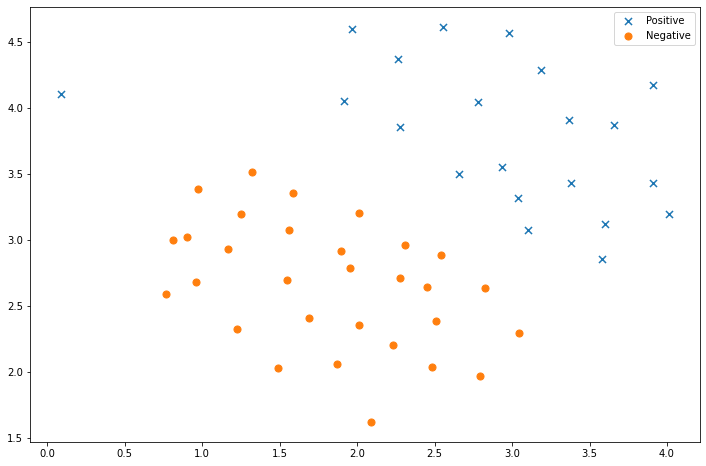

In [6]:
fig, ax = plt.subplots(figsize=(12,8))
plot_init_data(data, fig, ax)
ax.legend()
plt.show()

#### 线性svm

In [7]:
from sklearn import svm
# C 错误项的惩罚参数，loss='hinge' 标准的svm损失， max_iter 最大迭代次数
svc = svm.LinearSVC(C=1, loss='hinge', max_iter=1000)
svc

LinearSVC(C=1, loss='hinge')

In [8]:
# fit() 用于训练SVM
svc.fit(data[['X1', 'X2']], data['y'])
svc.score(data[['X1', 'X2']], data['y'])

E:\SoftWare\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.9803921568627451

#### 可视化分类边界

In [9]:
def find_decision_boundary(svc, x1min, x1max, x2min, x2max, diff):
    x1 = np.linspace(x1min, x1max, 1000)
    x2 = np.linspace(x2min, x2max, 1000)

    # 嵌套循环     
    cordinates = [(x, y) for x in x1 for y in x2]
    x_cord, y_cord = zip(*cordinates)
    c_val = pd.DataFrame({'x1':x_cord, 'x2':y_cord})
    print(c_val)
    # 计算样本点到超平面的距离     
    c_val['cval'] = svc.decision_function(c_val[['x1', 'x2']])
 
    decision = c_val[np.abs(c_val['cval']) < diff]
    print(decision)
    
    return decision.x1, decision.x2

         x1        x2
0       0.0  1.500000
1       0.0  1.503504
2       0.0  1.507007
3       0.0  1.510511
4       0.0  1.514014
...     ...       ...
999995  4.0  4.985986
999996  4.0  4.989489
999997  4.0  4.992993
999998  4.0  4.996496
999999  4.0  5.000000

[1000000 rows x 2 columns]
              x1        x2      cval
14999   0.056056  5.000000  0.000266
15998   0.060060  4.996496 -0.000225
16997   0.064064  4.992993 -0.000716
17996   0.068068  4.989489 -0.001206
17997   0.068068  4.992993  0.001654
...          ...       ...       ...
996186  3.987988  2.151652  0.001702
997184  3.991992  2.144645 -0.001649
997185  3.991992  2.148148  0.001211
998184  3.995996  2.144645  0.000721
999183  4.000000  2.141141  0.000230

[1379 rows x 3 columns]


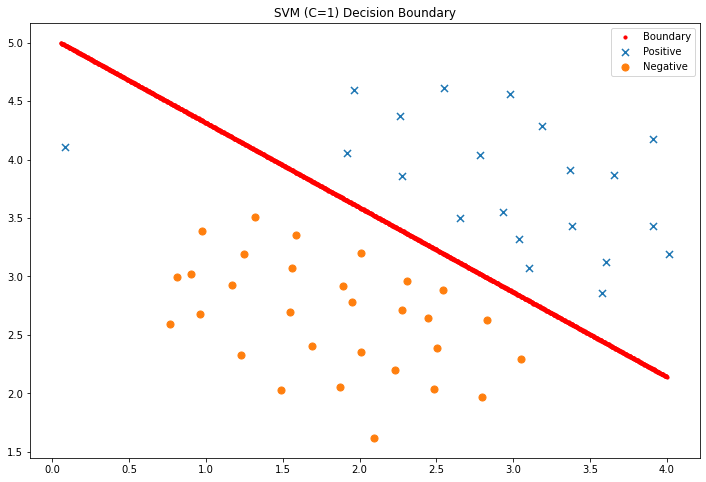

In [10]:
x1, x2 = find_decision_boundary(svc, 0, 4, 1.5, 5, 2 * 10**-3)
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(x1, x2, s=10, c='r',label='Boundary')
plot_init_data(data, fig, ax)
ax.set_title('SVM (C=1) Decision Boundary')
ax.legend()
plt.show()

In [11]:
# C=100
svc2 = svm.LinearSVC(C=100, loss='hinge', max_iter=1000)
svc2.fit(data[['X1', 'X2']], data['y'])
svc2.score(data[['X1', 'X2']], data['y'])

E:\SoftWare\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.9411764705882353

         x1        x2
0       0.0  1.500000
1       0.0  1.503504
2       0.0  1.507007
3       0.0  1.510511
4       0.0  1.514014
...     ...       ...
999995  4.0  4.985986
999996  4.0  4.989489
999997  4.0  4.992993
999998  4.0  4.996496
999999  4.0  5.000000

[1000000 rows x 2 columns]
              x1        x2      cval
14999   0.056056  5.000000  0.000266
15998   0.060060  4.996496 -0.000225
16997   0.064064  4.992993 -0.000716
17996   0.068068  4.989489 -0.001206
17997   0.068068  4.992993  0.001654
...          ...       ...       ...
996186  3.987988  2.151652  0.001702
997184  3.991992  2.144645 -0.001649
997185  3.991992  2.148148  0.001211
998184  3.995996  2.144645  0.000721
999183  4.000000  2.141141  0.000230

[1379 rows x 3 columns]


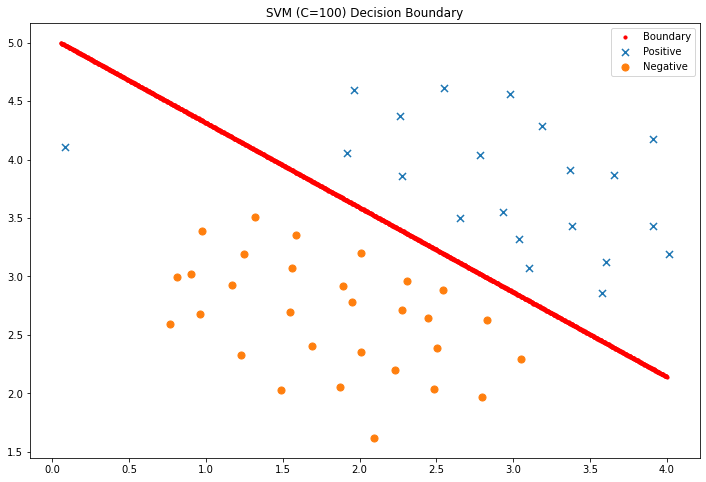

In [12]:
x1, x2 = find_decision_boundary(svc, 0, 4, 1.5, 5, 2 * 10**-3)
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(x1, x2, s=10, c='r',label='Boundary')
plot_init_data(data, fig, ax)
ax.set_title('SVM (C=100) Decision Boundary')
ax.legend()
plt.show()

### 1.2 高斯内核分类

In [13]:
# 高斯内核，衡量一对数据间的距离的函数
def gaussian_kernel(x1, x2, sigma):
    return np.exp(-(np.sum((x1 - x2) ** 2) / (2 * (sigma ** 2))))

In [14]:
x1 = np.array([1.0, 2.0, 1.0])
x2 = np.array([0.0, 4.0, -1.0])
sigma = 2

gaussian_kernel(x1, x2, sigma)

0.32465246735834974

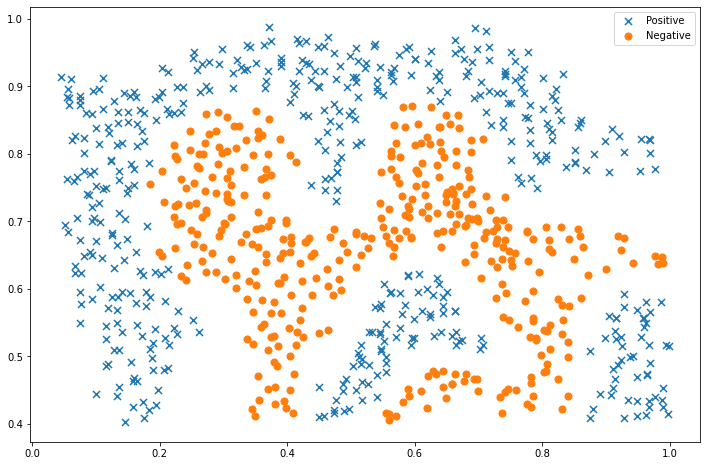

In [15]:
raw_data = loadmat('./datasets/ex6data2.mat')

data = pd.DataFrame(raw_data['X'], columns=['X1','X2'])
data['y'] = raw_data['y']

fig, ax = plt.subplots(figsize=(12,8))
plot_init_data(data, fig, ax)
ax.legend()
plt.show()

In [16]:
# C 惩罚参数， gamma 核函数参数， probability是否采用概率估计
svc = svm.SVC(C=100, gamma=10, probability=True)
svc

SVC(C=100, gamma=10, probability=True)

In [17]:
svc.fit(data[['X1', 'X2']], data['y'])
svc.score(data[['X1', 'X2']], data['y'])

0.9698725376593279

         x1        x2
0       0.0  0.400000
1       0.0  0.400601
2       0.0  0.401201
3       0.0  0.401802
4       0.0  0.402402
...     ...       ...
999995  1.0  0.997598
999996  1.0  0.998198
999997  1.0  0.998799
999998  1.0  0.999399
999999  1.0  1.000000

[1000000 rows x 2 columns]
              x1        x2      cval
186550  0.186186  0.730330  0.008182
186551  0.186186  0.730931  0.004357
186552  0.186186  0.731532  0.000706
186553  0.186186  0.732132 -0.002771
186554  0.186186  0.732733 -0.006072
...          ...       ...       ...
997567  0.997998  0.740541 -0.002189
998358  0.998999  0.615015 -0.000821
998568  0.998999  0.741141 -0.001645
999358  1.000000  0.615015  0.008954
999569  1.000000  0.741742 -0.001301

[1960 rows x 3 columns]


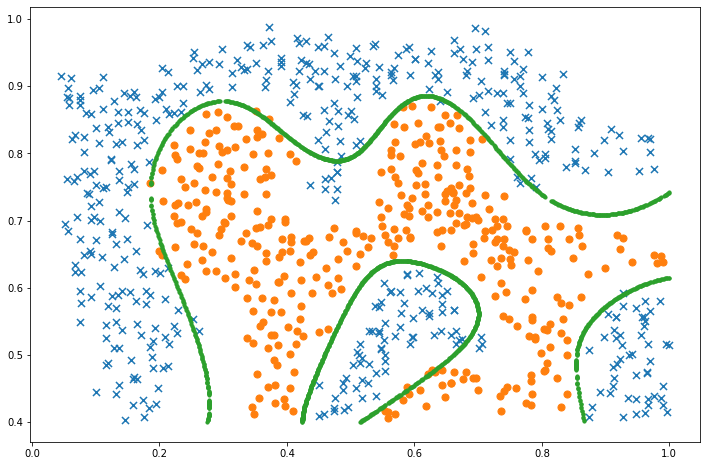

In [18]:
x1, x2 = find_decision_boundary(svc, 0, 1, 0.4, 1, 0.01)
fig, ax = plt.subplots(figsize=(12,8))
plot_init_data(data, fig, ax)
ax.scatter(x1, x2, s=10)
plt.show()

### 1.3 最优超参数

给出训练和验证集，并且基于验证集性能为SVM模型找到最优超参数

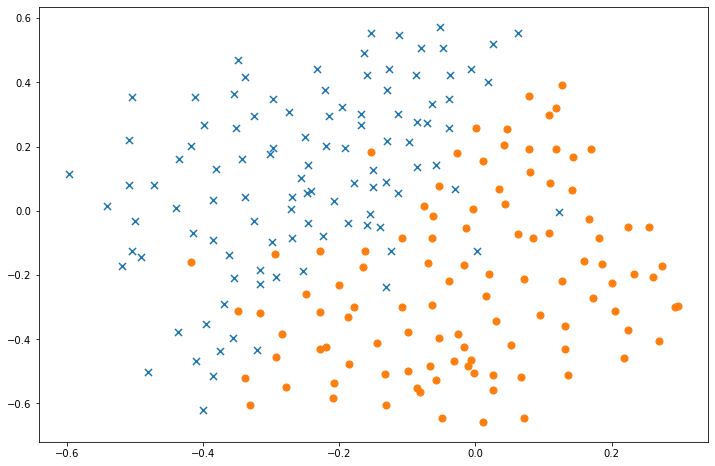

In [19]:
raw_data = loadmat('./datasets/ex6data3.mat')

X = raw_data['X']
Xval = raw_data['Xval']
y = raw_data['y'].ravel()
yval = raw_data['yval'].ravel()

fig, ax = plt.subplots(figsize=(12, 8))
data = pd.DataFrame(raw_data.get('X'), columns=['X1', 'X2'])
data['y'] = raw_data.get('y')
plot_init_data(data, fig, ax)
plt.show()

In [21]:
C_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]
gamma_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]

best_score = 0
best_params = {'C': None, 'gamma': None}

for C in C_values:
    for gamma in gamma_values:
        svc = svm.SVC(C=C, gamma=gamma)
        svc.fit(X, y)
        score = svc.score(Xval, yval)
        
        if score > best_score:
            best_score = score
            best_params['C'] = C
            best_params['gamma'] = gamma

best_score, best_params

(0.965, {'C': 0.3, 'gamma': 100})

         x1        x2
0      -0.6 -0.700000
1      -0.6 -0.698699
2      -0.6 -0.697397
3      -0.6 -0.696096
4      -0.6 -0.694795
...     ...       ...
999995  0.3  0.594795
999996  0.3  0.596096
999997  0.3  0.597397
999998  0.3  0.598699
999999  0.3  0.600000

[1000000 rows x 2 columns]
              x1        x2      cval
0      -0.600000 -0.700000 -0.001376
1      -0.600000 -0.698699 -0.001232
2      -0.600000 -0.697397 -0.001085
3      -0.600000 -0.696096 -0.000934
4      -0.600000 -0.694795 -0.000778
...          ...       ...       ...
994995  0.295495  0.594795 -0.004964
994996  0.295495  0.596096 -0.004962
994997  0.295495  0.597397 -0.004962
994998  0.295495  0.598699 -0.004962
994999  0.295495  0.600000 -0.004963

[8871 rows x 3 columns]


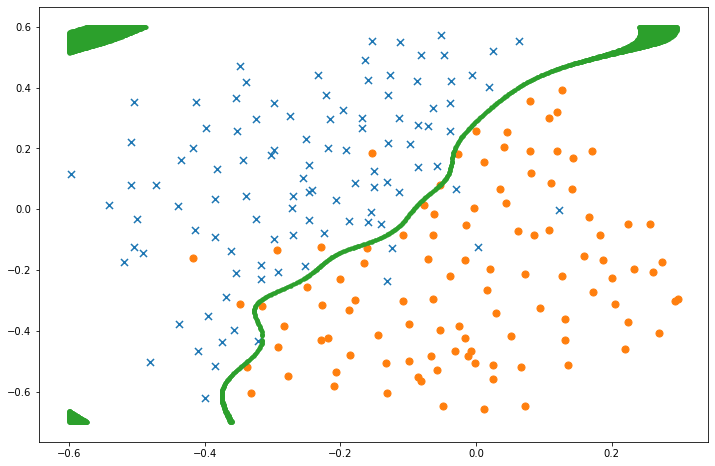

In [22]:
svc = svm.SVC(C=best_params['C'], gamma=best_params['gamma'])
svc.fit(X, y)

x1, x2 = find_decision_boundary(svc, -0.6, 0.3, -0.7, 0.6, 0.005)
fig, ax = plt.subplots(figsize=(12,8))
plot_init_data(data, fig, ax)
ax.scatter(x1, x2, s=10)
plt.show()